In [26]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
import tensorflow as tf

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
# Importing the dataset
df = pd.read_csv('train.csv')
df = df.drop(['id'], axis=1)
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [28]:
#creating the database
df['comment_text'] = df['comment_text'].str.lower()
df['comment_text'] = df['comment_text'].str.replace('[^\w\s]',' ')
df['comment_text'] = df['comment_text'].str.replace('\d+', '')
df['comment_text'] = df['comment_text'].str.replace('\n', ' ')
df['comment_text'] = df['comment_text'].str.replace('\t', ' ')
df['comment_text'] = df['comment_text'].str.replace('\r', ' ')

df['comment_text'] = df['comment_text'].str.replace('http\S+|www.\S+', '', case=False)

df['comment_text'] = df['comment_text'].str.replace(' +', ' ')
df['comment_text'] = df['comment_text'].str.strip()
df.head()

<ipython-input-28-eb5087996956>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace('[^\w\s]',' ')
<ipython-input-28-eb5087996956>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace('\d+', '')
<ipython-input-28-eb5087996956>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace('http\S+|www.\S+', '', case=False)
<ipython-input-28-eb5087996956>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace(' +', ' ')


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [29]:
#Tokenization
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokens = df['comment_text'].apply(tokenizer.tokenize)
tokens.head()

0    [explanation, why, the, edits, made, under, my...
1    [d, aww, he, matches, this, background, colour...
2    [hey, man, i, m, really, not, trying, to, edit...
3    [more, i, can, t, make, any, real, suggestions...
4    [you, sir, are, my, hero, any, chance, you, re...
Name: comment_text, dtype: object

In [30]:
#removing the stopwords

stop = stopwords.words('english')
tokens = tokens.apply(lambda x: [item for item in x if item not in stop])
tokens.head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, matches, background, colour, seemingly, ...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestions, improvement, wondere...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

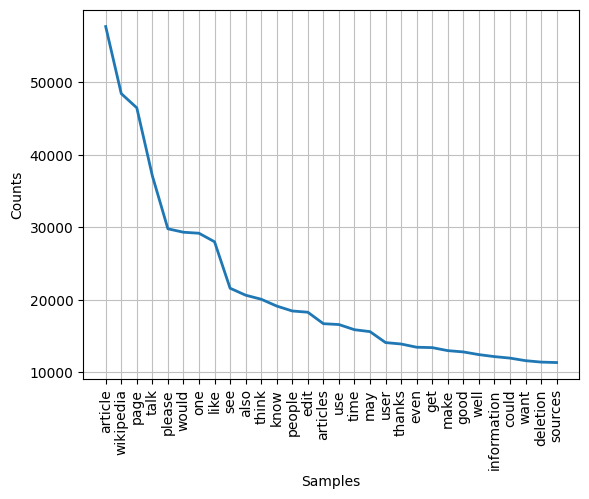

In [31]:
#Visualisation graphique des mots les plus fréquents dans le dataset classés par ordre décroissant


fdist = FreqDist()
for i in range(len(tokens)):
    for word in tokens[i]:
        fdist[word] += 1
fdist.most_common(10)

fdist.plot(30,cumulative=False)
plt.show()

In [32]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
tokens = tokens.apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
tokens.head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, match, background, colour, seemingly, st...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestion, improvement, wondered...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

In [33]:
#Stemming
stemmer = LancasterStemmer()
tokens = tokens.apply(lambda x: [stemmer.stem(y) for y in x])
tokens.head()

0    [expl, edit, mad, usernam, hardc, metallic, fa...
1    [aww, match, background, colo, seem, stuck, th...
2    [hey, man, real, try, edit, war, guy, const, r...
3    [mak, real, suggest, improv, wond, sect, stat,...
4                      [sir, hero, chant, rememb, pag]
Name: comment_text, dtype: object

In [34]:
#replace the tokens in the dataframe
df['comment_text'] = tokens.apply(lambda x: ' '.join(x))
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,expl edit mad usernam hardc metallic fan rever...,0,0,0,0,0,0
1,aww match background colo seem stuck thank tal...,0,0,0,0,0,0
2,hey man real try edit war guy const remov rele...,0,0,0,0,0,0
3,mak real suggest improv wond sect stat lat sub...,0,0,0,0,0,0
4,sir hero chant rememb pag,0,0,0,0,0,0


In [35]:
#splitting the data

X = df['comment_text']
y = df.drop(['comment_text'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127656,), (31915,), (127656, 6), (31915, 6))

In [36]:
#tokenizing the data


maxlen = 100
training_samples = 20000
validation_samples = 5000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = tf.keras.utils.pad_sequences(sequences, maxlen=maxlen)

Found 103168 unique tokens.


In [37]:
#building the model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 4806      
                                                                 
Total params: 84,806
Trainable params: 84,806
Non-trainable params: 0
_________________________________________________________________


In [38]:
#training the model
import os


checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


history = model.fit(data, y_train, epochs=5, batch_size=32, validation_split=0.2, callbacks=[cp_callback])

Epoch 1/5
3192/3192 [==============================] - ETA: 0s - loss: 0.0908 - acc: 0.9133
Epoch 1: saving model to training_1/cp.ckpt
3192/3192 [==============================] - 79s 24ms/step - loss: 0.0908 - acc: 0.9133 - val_loss: 0.0697 - val_acc: 0.7195
Epoch 2/5
3192/3192 [==============================] - ETA: 0s - loss: 0.0619 - acc: 0.7776
Epoch 2: saving model to training_1/cp.ckpt
3192/3192 [==============================] - 38s 12ms/step - loss: 0.0619 - acc: 0.7776 - val_loss: 0.0674 - val_acc: 0.7589
Epoch 3/5
3192/3192 [==============================] - ETA: 0s - loss: 0.0569 - acc: 0.7266
Epoch 3: saving model to training_1/cp.ckpt
3192/3192 [==============================] - 33s 10ms/step - loss: 0.0569 - acc: 0.7266 - val_loss: 0.0661 - val_acc: 0.7652
Epoch 4/5
3192/3192 [==============================] - ETA: 0s - loss: 0.0533 - acc: 0.6757
Epoch 4: saving model to training_1/cp.ckpt
3192/3192 [==============================] - 34s 11ms/step - loss: 0.0533 - acc: 

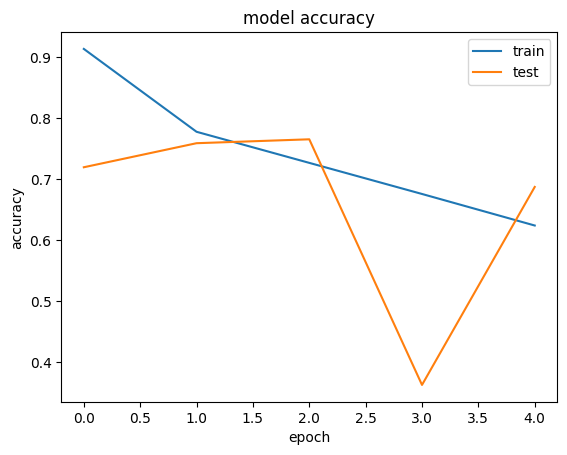

In [39]:
#plotting the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

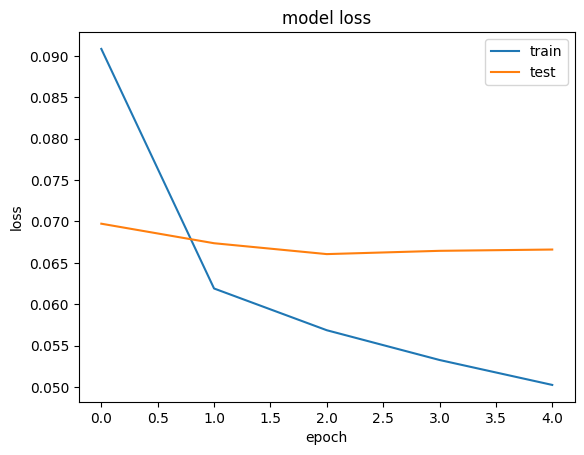

In [40]:
#plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [41]:
#evaluating the model
model.evaluate(data, y_train)

3990/3990 [==============================] - 24s 6ms/step - loss: 0.0495 - acc: 0.6850


[0.049501534551382065, 0.6849501729011536]

In [42]:
#predicting the test data
test_sequences = tokenizer.texts_to_sequences(X_test)
test_data = tf.keras.utils.pad_sequences(test_sequences, maxlen=maxlen)
test_pred = model.predict(test_data)

998/998 [==============================] - 2s 2ms/step


In [43]:
#write a comment and predict the toxicity of it
comment = ['you are a stupid idiot']
comment = tokenizer.texts_to_sequences(comment)
comment = tf.keras.utils.pad_sequences(comment, maxlen=maxlen)
model.predict(comment)

1/1 [==============================] - 0s 28ms/step


array([[0.99865365, 0.09666877, 0.9367986 , 0.01598816, 0.8368961 ,
        0.09486187]], dtype=float32)